<a href="https://colab.research.google.com/github/kylearrigoni/Web-Scraping/blob/master/HeadlessWebScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Submitted for Medium post: "Virtual, Headless, and Distributed (Oh My!)"
"Fearless Web Scraping with Python in DataLab 

#### Copyright 3-11-2019 by Zecca Lehn

In [ ]:
%%bash

chmod 777 /tmp
mkdir data
apt-get update --allow-unauthenticated 
apt-get update -y --fix-missing 
pip install selenium
apt-get install chromium-chromedriver -y --fix-missing
pip install joblib
apt-get update --fix-missing


Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Get:13 https://developer.download.nvi

In [ ]:
# ! ls /usr/bin # Webdriver and Chromium binary installed here

In [ ]:
## Import list of https proxies
import warnings;
warnings.filterwarnings('ignore')

import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
URL = "https://free-proxy-list.net/"
req = requests.get(URL, headers = headers) # .json()
soup = BeautifulSoup(req.text, "lxml")

for body in soup("tbody"):
    body.unwrap()

df = pd.read_html(str(soup), flavor="bs4")
df = pd.DataFrame(df[0])
proxies = df[(df.Https == 'yes')] # (df.Https == 'yes') & (df.Country == 'United States')
proxies['Port'] = proxies['Port'].astype(int)
proxies.sample(10)

,IP Address,Port,Code,Country,Anonymity,Google,Https,Last Checked
67,145.239.169.45,1080,FR,France,elite proxy,no,yes,3 minutes ago
287,103.31.227.16,8080,ID,Indonesia,anonymous,no,yes,24 minutes ago
150,149.56.142.206,3128,CA,Canada,anonymous,no,yes,13 minutes ago
212,36.89.183.51,53281,ID,Indonesia,elite proxy,no,yes,21 minutes ago
254,200.94.140.50,46857,MX,Mexico,elite proxy,no,yes,24 minutes ago
218,177.1.81.114,37740,BR,Brazil,elite proxy,no,yes,21 minutes ago
265,171.100.9.126,49163,TH,Thailand,elite proxy,no,yes,24 minutes ago
216,37.9.134.88,35853,RU,Russian Federation,elite proxy,no,yes,21 minutes ago
73,51.38.71.101,8080,GB,United Kingdom,elite proxy,no,yes,3 minutes ago
130,104.236.248.219,3128,US,United States,anonymous,no,yes,13 minutes ago


In [ ]:
# ## Your IP address
import requests
from bs4 import BeautifulSoup

URL = 'https://api.ipify.org?format=json'
req = requests.get(URL) # .json()
soup = BeautifulSoup(req.text, "lxml")
ip = soup.find('p').text
print('Your IP ', ip)

Your IP  {"ip":"34.73.96.33"}


In [ ]:
## Test Headless Browser with BeautifulSoup
import selenium
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

options = Options()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.binary_location = '/usr/bin/chromium-browser'

driver = webdriver.Chrome(executable_path='/usr/bin/chromedriver', options = options)
driver.get("https://api.ipify.org/?format=json")
html = driver.page_source
soup = BeautifulSoup(html)
ip = soup.find('pre').text
print('IP from scrape ', ip)

# OUTPUT:
# IP from scrape  {"ip":"35.197.23.94"}


IP from scrape  {"ip":"34.73.96.33"}


In [ ]:
## Unrendered proxy return without headless

import requests
from bs4 import BeautifulSoup

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
URL = 'https://api.ipify.org?format=json'
proxy = {'https': '200.255.122.174:8080'}
req = requests.get(URL, proxies = proxy, headers = headers) # .json()
soup = BeautifulSoup(req.text, "lxml")
ip = soup.find('p').text
print('IP from scrape w/proxy ', ip)

# Output
# IP from scrape w/proxy  {"ip":"200.255.122.174"} # Tests proxy

IP from scrape w/proxy  {"ip":"200.255.122.174"}


IP to test:  200.255.122.174  and Port: 8080


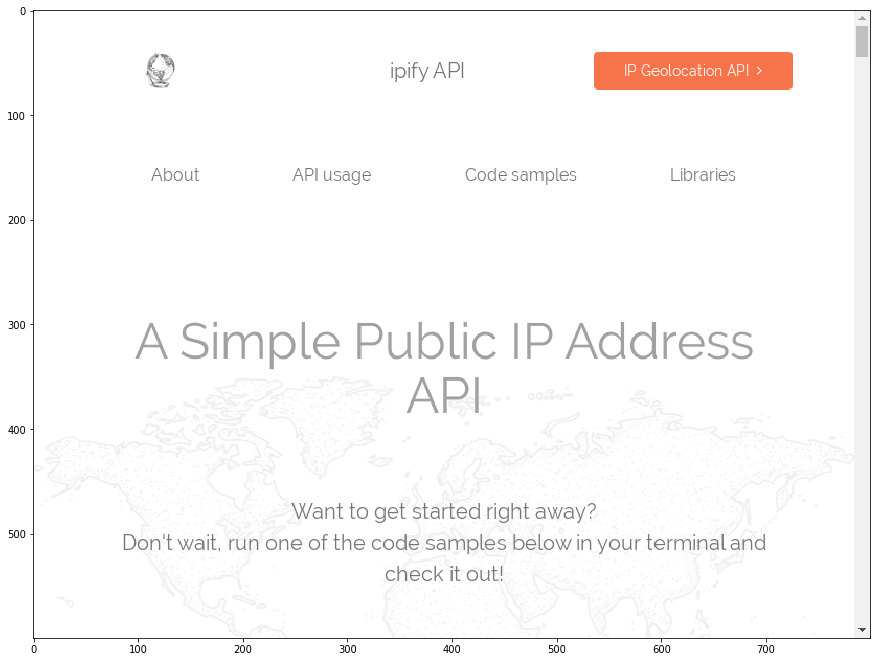

Working: 200.255.122.174:8080
CPU times: user 531 ms, sys: 238 ms, total: 769 ms
Wall time: 7.14 s


In [ ]:
%%time

### Headless Scrape w/Single Proxy
### Imports list of https proxies and renders a sample in Chromium

## Import list of https proxies
import warnings;
warnings.filterwarnings('ignore')

import time
import os
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.proxy import Proxy, ProxyType
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup


def proxySelenium(proxyIP, proxyPort, headless = True):
    
    
    try:
        
        ourProxy = str(proxyIP) + ":" + str(proxyPort) # Use this for https anonymous/elite 

        proxy = Proxy({
            'proxyType': ProxyType.MANUAL,
            'httpProxy': ourProxy,
            'ftpProxy' : ourProxy,
            'sslProxy' : ourProxy,
            'noProxy'  : ''
        })

        options = webdriver.ChromeOptions()
        if headless == True:
          
          # Deletes web preview if it exists already
          if os.path.exists('data/' + str(proxyIP) + '_' + 'screenshot.png'):
            os.remove('data/' + str(proxyIP) + '_' + 'screenshot.png')
            
          options.add_argument('--headless')
          options.add_argument('--no-sandbox')
          options.add_argument('--disable-dev-shm-usage')
          options.binary_location = '/usr/bin/chromium-browser'

        # Configure capabilities 
        capabilities = dict(DesiredCapabilities.CHROME)
        proxy.add_to_capabilities(capabilities)

        driver = webdriver.Chrome(executable_path='/usr/bin/chromedriver', desired_capabilities = capabilities, options = options)
        driver.set_page_load_timeout(200)

        # Open page and take screenshot
        driver.get("http://www.ipify.org/")

        if headless == False:
            time.sleep(3)

        driver.get_screenshot_as_file('data/' + str(proxyIP) + '_' + 'screenshot.png')

      # IP Text
        driver.get("https://api.ipify.org/?format=json")
        html = driver.page_source
        soup = BeautifulSoup(html)
        ip = soup.find('pre').text
        driver.quit()

        if headless == True:
          ## Show Screeenshot
          image = mpimg.imread('data/' + str(proxyIP) + '_' + 'screenshot.png')
          plt.figure(figsize=(20,20))
          plt.imshow(image)
          plt.show()
            
          # Remove Image
          os.remove('data/' + str(proxyIP) + '_' + 'screenshot.png')

        print("Working: " + str(proxyIP) + ":" + str(proxyPort))
        return "Working: " + str(proxyIP) + ":" + str(proxyPort)
      
    except:
        print("Proxy inactive: " + str(proxyIP) + ":" + str(proxyPort))
        return "Proxy inactive: " + str(proxyIP) + ":" + str(proxyPort)
        driver.quit()
    
# prox = proxies.sample(n=1)
proxyIP = '200.255.122.174'     # list(prox['IP Address'])[0] # 
proxyPort = '8080'              # list(prox['Port'])[0] 

print('IP to test: ', proxyIP, ' and Port:', proxyPort)
proxySelenium(proxyIP, proxyPort)

In [ ]:
%%time

### Parallelized proxy check over 10 sampled IPs w/Non-Headless

import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def soupParallel(proxyIP, proxyPort):
    
    try:
        
        time.sleep(1)
        headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36'}
        URL = 'https://api.ipify.org?format=json'
        proxy = {'https': str(proxyIP) + ":" + str(proxyPort)}
        print("Input IP proxy: ", proxy)
        req = requests.get(URL, proxies = proxy, headers = headers) # .json()
        soup = BeautifulSoup(req.text, "lxml")
        ip = soup.find('p').text
        return 'IP from scrape w/proxy ' + str(ip)
        
    except:
        
        print("Proxy inactive: " + str(proxy))
        return "Proxy inactive: " + str(proxy)
        
## Parallel read of soupParallel function
from joblib import Parallel, delayed, parallel_backend
import multiprocessing

with parallel_backend('multiprocessing'):

  num_cores = multiprocessing.cpu_count()
  results = Parallel(n_jobs = num_cores)(delayed(soupParallel)(proxyIP = list(proxies['IP Address'])[i], 
        proxyPort = list(proxies['Port'])[i]) for i in range(0, len(proxies.head(10)) )) # len(proxies.head(10))

print(pd.DataFrame(results))

Input IP proxy:  {'https': '154.117.143.126:8080'}
Input IP proxy:  {'https': '185.132.178.143:1080'}
Input IP proxy:  {'https': '185.101.238.34:39238'}
Proxy inactive: {'https': '185.132.178.143:1080'}
Input IP proxy:  {'https': '140.227.170.6:60088'}
Input IP proxy:  {'https': '177.53.59.96:55427'}
Input IP proxy:  {'https': '217.210.157.135:41212'}
Proxy inactive: {'https': '217.210.157.135:41212'}
Input IP proxy:  {'https': '138.0.229.213:33611'}
Input IP proxy:  {'https': '77.46.146.252:53281'}
Input IP proxy:  {'https': '154.119.79.254:53281'}
Input IP proxy:  {'https': '74.113.173.78:47208'}
Proxy inactive: {'https': '154.119.79.254:53281'}
Proxy inactive: {'https': '74.113.173.78:47208'}
                                                   0
0    IP from scrape w/proxy {"ip":"154.117.143.126"}
1  Proxy inactive: {'https': '185.132.178.143:1080'}
2     IP from scrape w/proxy {"ip":"185.101.238.34"}
3      IP from scrape w/proxy {"ip":"140.227.170.6"}
4       IP from scrape w/proxy

Working: 185.132.178.143:1080
Working: 154.117.143.126:8080


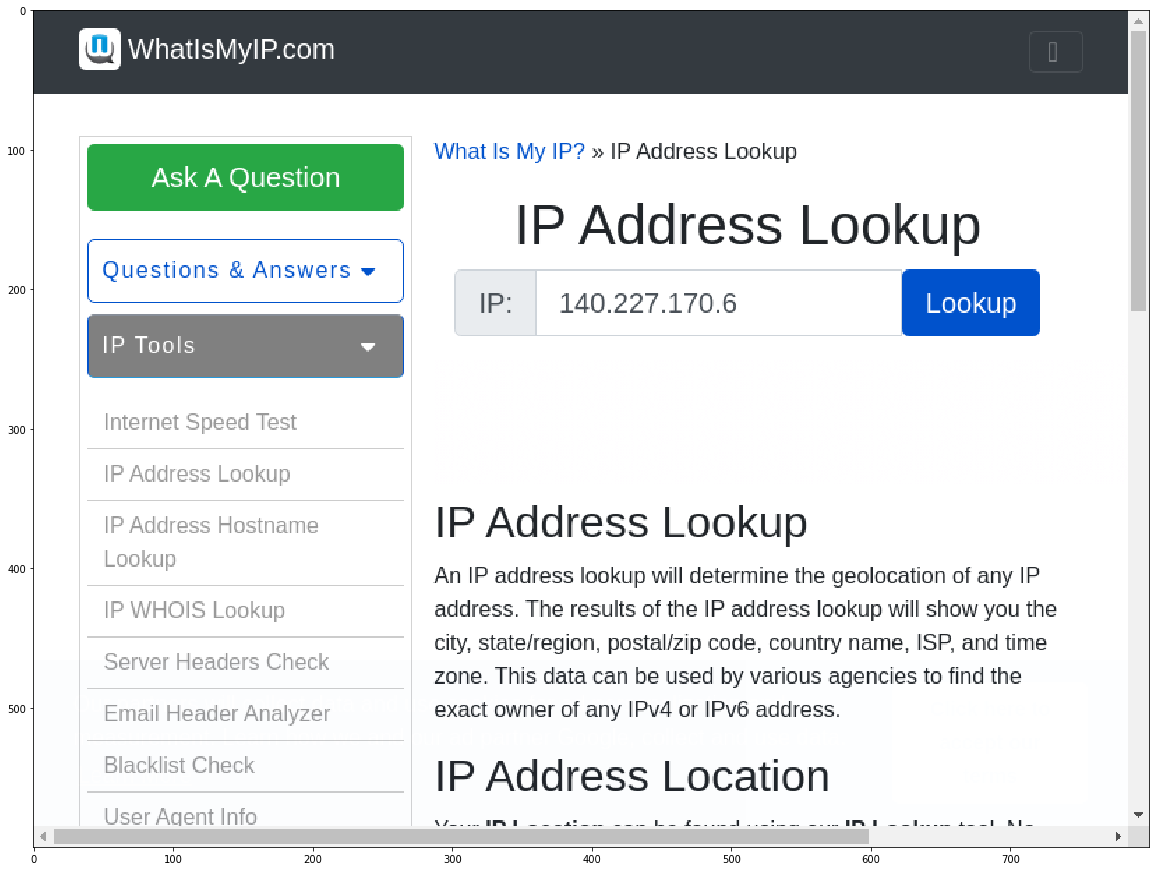

Working: 140.227.170.6:60088


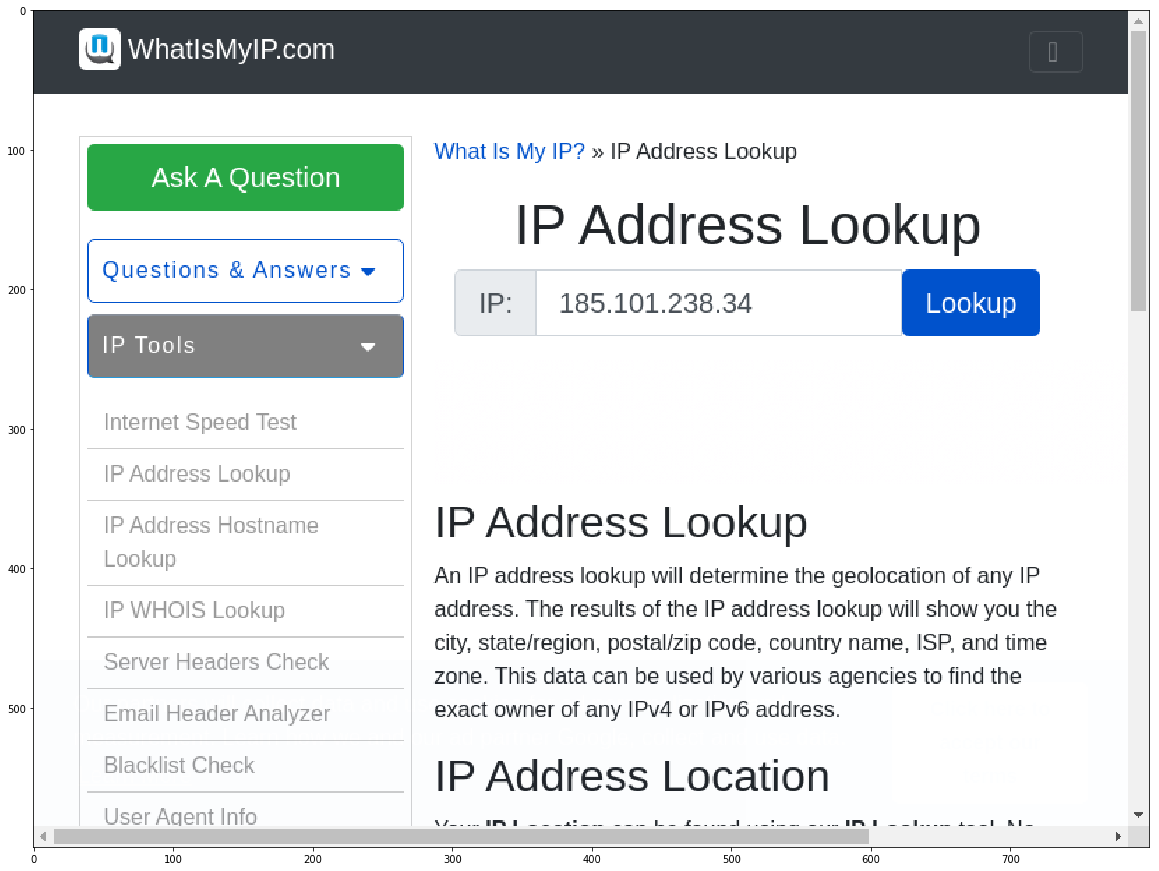

Working: 185.101.238.34:39238
Proxy inactive: 217.210.157.135:41212


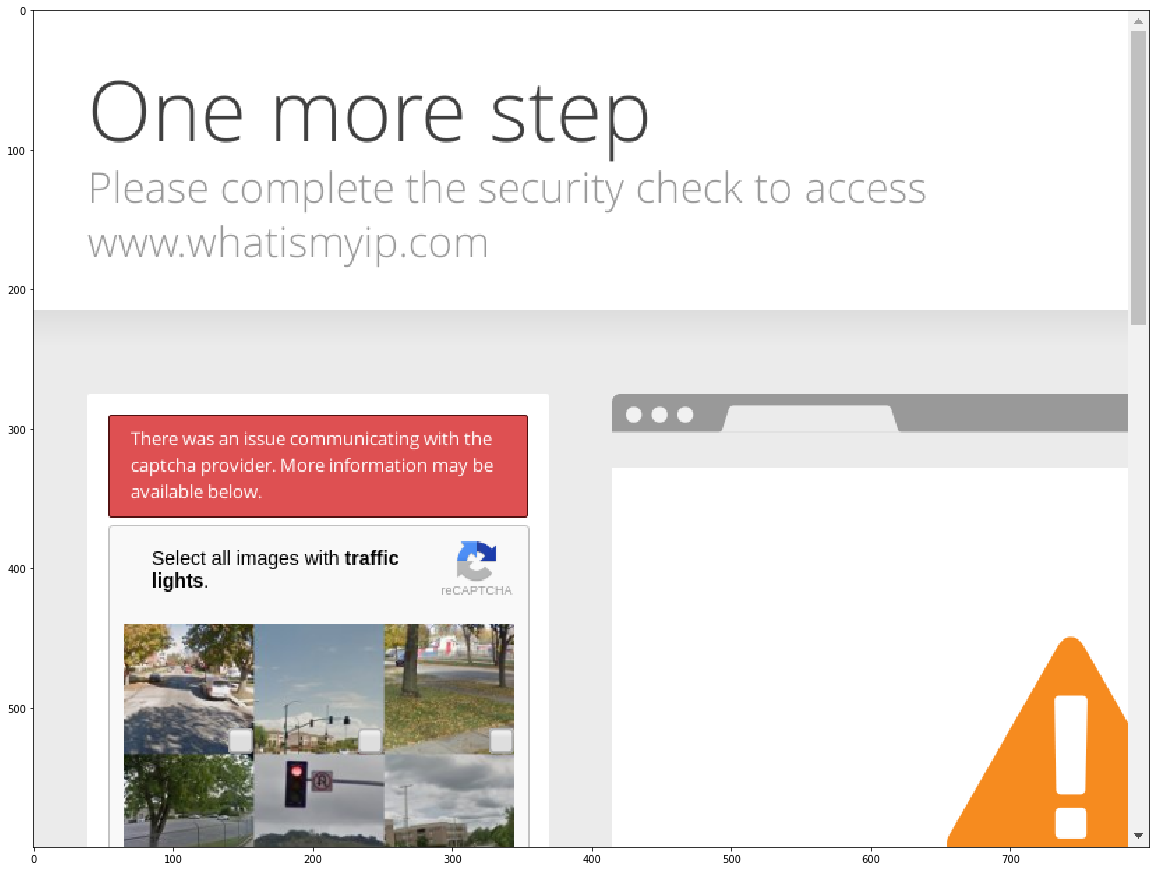

Working: 138.0.229.213:33611


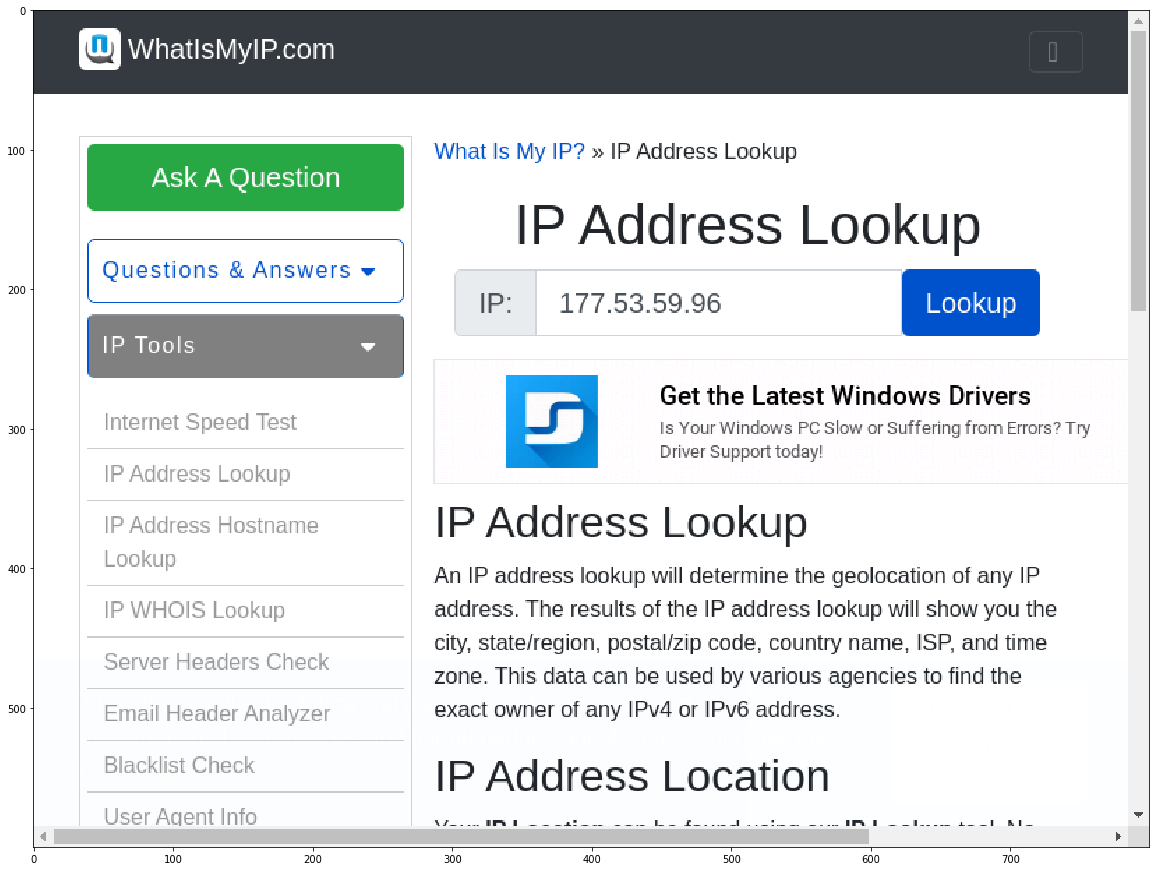

Working: 177.53.59.96:55427


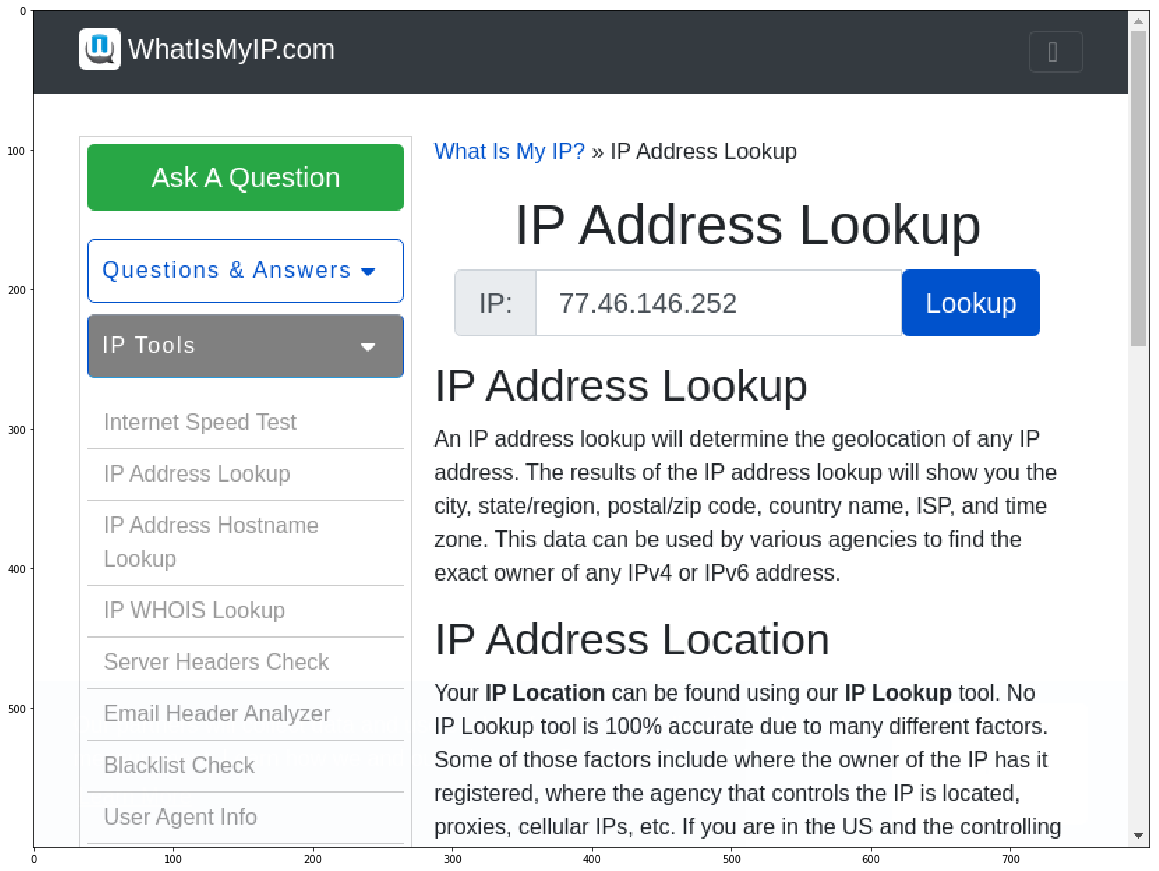

Working: 77.46.146.252:53281


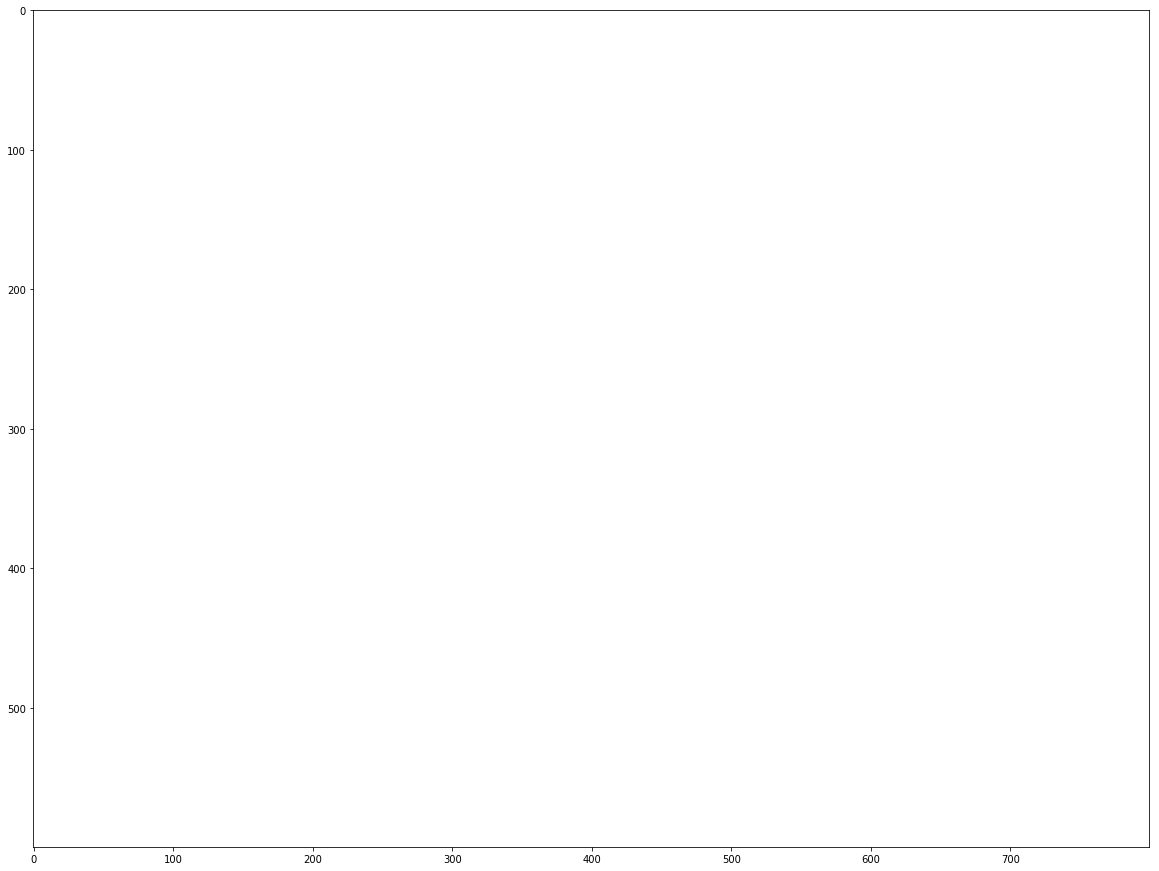

Working: 74.113.173.78:47208


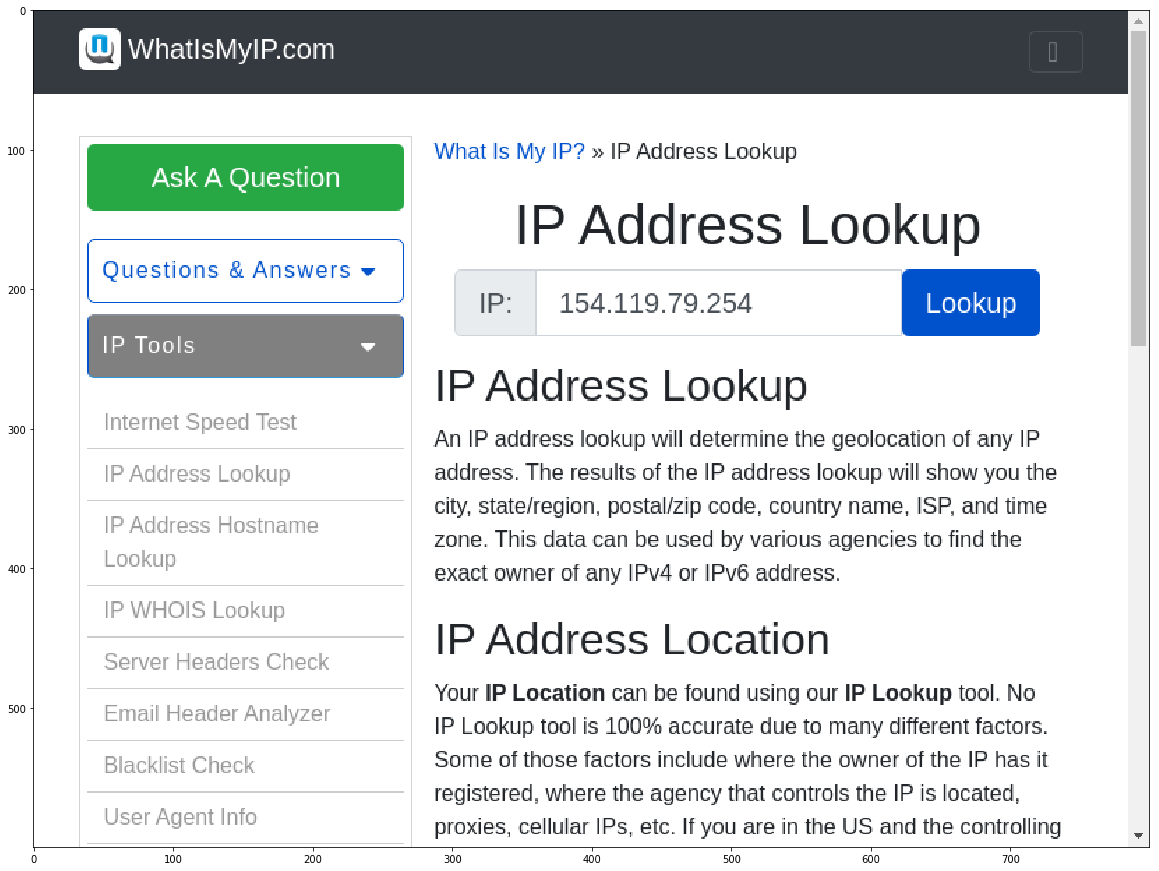

Working: 154.119.79.254:53281
                                       0
0          Working: 154.117.143.126:8080
1          Working: 185.132.178.143:1080
2          Working: 185.101.238.34:39238
3           Working: 140.227.170.6:60088
4            Working: 177.53.59.96:55427
5  Proxy inactive: 217.210.157.135:41212
6           Working: 138.0.229.213:33611
7           Working: 77.46.146.252:53281
8          Working: 154.119.79.254:53281
9           Working: 74.113.173.78:47208
CPU times: user 569 ms, sys: 145 ms, total: 714 ms
Wall time: 6min 32s


In [ ]:
%%time

### Headless Scrape w/Single Proxy
### Imports list of https proxies and renders a sample in Chromium

import warnings;
warnings.filterwarnings('ignore')
import time
import os
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.proxy import Proxy, ProxyType
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from bs4 import BeautifulSoup


def proxySeleniumParallel(proxyIP, proxyPort, headless = True):
    
    try:
        
        ourProxy = str(proxyIP) + ":" + str(proxyPort) # Use this for https anonymous/elite 

        proxy = Proxy({
            'proxyType': ProxyType.MANUAL,
            'httpProxy': ourProxy,
            'ftpProxy' : ourProxy,
            'sslProxy' : ourProxy,
            'noProxy'  : ''
        })

        options = webdriver.ChromeOptions()
        if headless == True:
          
          # Deletes web preview if it exists already
          if os.path.exists('data/' + str(proxyIP) + '_' + 'screenshot.png'):
            os.remove('data/' + str(proxyIP) + '_' + 'screenshot.png')
            
          options.add_argument('--headless')
          options.add_argument('--no-sandbox')
          options.add_argument('--disable-dev-shm-usage')
          options.binary_location = '/usr/bin/chromium-browser'

        # Configure capabilities 
        capabilities = dict(DesiredCapabilities.CHROME)
        proxy.add_to_capabilities(capabilities)

        driver = webdriver.Chrome(executable_path='/usr/bin/chromedriver', desired_capabilities = capabilities, options = options)
        driver.set_page_load_timeout(200)

        # Open page and take screenshot
        driver.get("https://www.whatismyip.com/ip-address-lookup/") # http://www.ipify.org/

        if headless == False:
            time.sleep(3)

        driver.get_screenshot_as_file('data/' + str(proxyIP) + '_' + 'screenshot.png')

      # IP Text
        driver.get("https://api.ipify.org/?format=json")
        html = driver.page_source
        soup = BeautifulSoup(html)
        ip = soup.find('pre').text
        driver.quit()

        if headless == True:
          ## Show Screeenshot
          image = mpimg.imread('data/' + str(proxyIP) + '_' + 'screenshot.png')
          plt.figure(figsize=(20,30))
          plt.imshow(image)
          plt.show()
            
          # Remove Image
          os.remove('data/' + str(proxyIP) + '_' + 'screenshot.png')

        print("Working: " + str(proxyIP) + ":" + str(proxyPort))
        return "Working: " + str(proxyIP) + ":" + str(proxyPort)
      
    except:
        print("Proxy inactive: " + str(proxyIP) + ":" + str(proxyPort))
        return "Proxy inactive: " + str(proxyIP) + ":" + str(proxyPort)
        driver.quit()
    

## Parallel read of soupParallel function
from joblib import Parallel, delayed, parallel_backend
import multiprocessing

with parallel_backend('multiprocessing'):
  num_cores = multiprocessing.cpu_count()
  results = Parallel(n_jobs = num_cores)(delayed(proxySeleniumParallel)(proxyIP =list(proxies['IP Address'])[i], 
        proxyPort = list(proxies['Port'])[i], headless = True) for i in range(len(proxies.head(10)))) # len(proxies.head(10))

print(pd.DataFrame(results))